##### Imports and Loading in the data

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [21]:
df = pd.read_csv(filepath_or_buffer= 'supply_chain_data.csv')

##### Data Cleaning and looking for missng values

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [23]:
df.describe()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [24]:
# Looking for any missing values
print("Amount of missing values per col")
df.isna().sum()


Amount of missing values per col


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [25]:
# Looking for duplicated values
print('Amount of duplicated values are:', int(df.duplicated().sum()))


Amount of duplicated values are: 0


In [26]:
skip_items = ['SKU','Price','Availability','Number of products sold','Revenue generated','Shipping costs','Costs','Manufacturing costs','Defect rates']
for col in df.columns:
    if col in skip_items:
        continue
    else:
        print(col,' : ',df[col].unique())


Product type  :  ['haircare' 'skincare' 'cosmetics']
Customer demographics  :  ['Non-binary' 'Female' 'Unknown' 'Male']
Stock levels  :  [ 58  53   1  23   5  90  11  93  14  51  46 100  80  54   9   2  45  10
  48  27  69  71  84   4  82  59  47  60   6  89  42  18  25  78  64  22
  36  13  92  30  97  31  96  33  41  32  86  73  57  12   0  95  76  17
  16  38  39  65  15  66  98  63  77  67  55]
Lead times  :  [ 7 30 10 13  3 27 15 17 23  8 29  5 11 12 25  1 26 16  9 20 19 24  4 22
 18  2  6 28 14]
Order quantities  :  [96 37 88 59 56 66 58 11 15 83 80 60 85 48 78 69 46 94 68  7 63 29  2 52
 62 24 67 35 44 64 95 21 28 34 39 38 57 72  6 51  9 82 54 61 26 36 40 10
 75 19 71 27 22 77  1 20 41  8 55 32  4]
Shipping times  :  [ 4  2  6  8  3  1  7  9  5 10]
Shipping carriers  :  ['Carrier B' 'Carrier A' 'Carrier C']
Supplier name  :  ['Supplier 3' 'Supplier 1' 'Supplier 5' 'Supplier 4' 'Supplier 2']
Location  :  ['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']
Lead time  :  [29 23 12 2

In [27]:
list(df.columns)

['Product type',
 'SKU',
 'Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Customer demographics',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping carriers',
 'Shipping costs',
 'Supplier name',
 'Location',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Inspection results',
 'Defect rates',
 'Transportation modes',
 'Routes',
 'Costs']

#### Inventory Optimization & Stock-Out Prevention
Ensure the right amount of product is in the right place at the right time.

In [29]:
import numpy as np

# 1. Calculate Usage Value
df['Usage_Value'] = df['Costs'] * df['Number of products sold']

# 2. Sort and calculate cumulative percentage (standardizes the logic)
df = df.sort_values(by='Usage_Value', ascending=False).reset_index(drop=True)
df['cum_perc'] = df['Usage_Value'].cumsum() / df['Usage_Value'].sum()

# 3. Use np.select for vectorized labeling
conditions = [
    df['cum_perc'] <= 0.70,
    df['cum_perc'] <= 0.90
]
choices = ['High (A)', 'Medium (B)']

df['ABC_category'] = np.select(conditions, choices, default='Low (C)')

In [30]:
print(df['ABC_category'].value_counts(normalize=True))

ABC_category
Low (C)       0.39
High (A)      0.35
Medium (B)    0.26
Name: proportion, dtype: float64


In [31]:
df['ABC_category'].isna().sum()

np.int64(0)

'\nGreen: Class A\nYellow : Class B\nRed: Class C\n\nABC analysis is an inventory management method that classifies stock into three categories (A, B, C) \nbased on value and importance, applying the Pareto Principle (80/20 rule) to focus resources where they matter most: \nA items are high-value, require tight control (e.g., 70-80% cost, 20% quantity); B items are mid-range (moderate control); \nand C items are low-value, numerous, and need minimal control (e.g., 10% cost, 50% quantity). This technique optimizes \ninventory control, reduces costs, and improves efficiency by prioritizing management efforts on critical items, leading \nto better stock availability and profitability. \n'

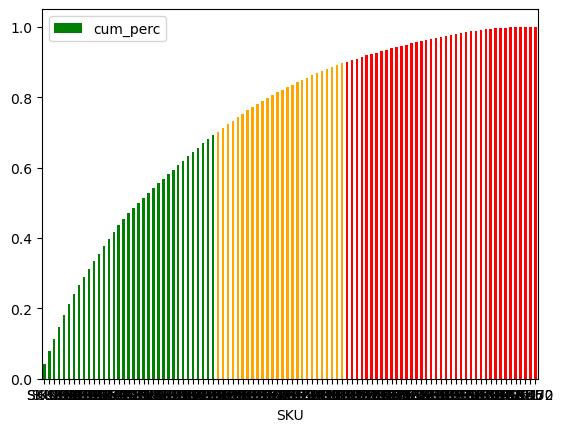

In [32]:
# Create a vertical bar plot to show 
color_map = {'High (A)': 'green', 'Medium (B)': 'orange', 'Low (C)': 'red'}

# Create the color list
colors = df['ABC_category'].map(color_map)

# Plot using the 'color' list
ax = df.plot.bar(x='SKU', y='cum_perc', rot=0, color=colors)

'''
Green: Class A
Yellow : Class B
Red: Class C

ABC analysis is an inventory management method that classifies stock into three categories (A, B, C) 
based on value and importance, applying the Pareto Principle (80/20 rule) to focus resources where they matter most: 
A items are high-value, require tight control (e.g., 70-80% cost, 20% quantity); B items are mid-range (moderate control); 
and C items are low-value, numerous, and need minimal control (e.g., 10% cost, 50% quantity). This technique optimizes 
inventory control, reduces costs, and improves efficiency by prioritizing management efforts on critical items, leading 
to better stock availability and profitability. 
'''




In [33]:
# Show which SKUs are in each class

print("List of Low value SKUs")
print((pd.DataFrame(df.loc[df['ABC_category'] == 'Low (C)'])))



List of Low value SKUs
   Product type    SKU      Price  Availability  Number of products sold  \
61     skincare  SKU39  19.127477            26                      176   
62     haircare  SKU57  49.263205            65                      227   
63     haircare  SKU51  26.700761            61                      154   
64     skincare  SKU69  54.865529            62                      511   
65     skincare  SKU64  89.634096            11                      134   
66     skincare  SKU31  50.847393            28                      168   
67     skincare  SKU58  59.841561            81                      896   
68     skincare  SKU42  46.529168            98                      155   
69     haircare  SKU93  69.290831            88                      114   
70     skincare  SKU75  92.996884            29                      106   
71     skincare  SKU19  51.123870           100                      187   
72     skincare  SKU67  87.755432            16                  

#### Actionable Insights
The team should look into retiring some of the low category items has it is not moving as well and not producing alot of revenue for the company
The focus should be shifted more toward level A items. 


### Supplier Performance & Quality Control

In [34]:
''''
What you can do:
Supplier Scorecard: Rank suppliers by a weighted score of Defect rates (quality) and Manufacturing lead time (speed).
Correlation Analysis: Check if higher Manufacturing costs actually lead to lower Defect rates.
'''


"'\nWhat you can do:\nSupplier Scorecard: Rank suppliers by a weighted score of Defect rates (quality) and Manufacturing lead time (speed).\nCorrelation Analysis: Check if higher Manufacturing costs actually lead to lower Defect rates.\nAnomaly Detection: Use Inspection results to find outliers—suppliers who are consistently underperforming compared to the average.\n"

In [35]:
supplierScoreCard = pd.DataFrame(df[['SKU', 'Product type','Price','Lead times','Defect rates','Supplier name'
]])





In [36]:
lead_time = 29
defect_rate = 0.22641036084992516
targetLeadTime = 1


supplierScoreCard['Supplier Score'] = (targetLeadTime/supplierScoreCard['Lead times']) * 100 * 0.4 + (1-supplierScoreCard['Defect rates']/100) * 100 * 0.6






In [37]:
print((10/1) * 100 * 0.4 + (1-0.613327/100) * 100 * 0.6)
print((1) * 100 * 0.4 + (1-0.613327/100) * 100 * 0.6)

print(supplierScoreCard['Defect rates'].max())


459.6320038
99.6320038
4.939255288620948


In [40]:
supplierScoreCard.groupby(by = 'Supplier name')['Supplier Score'].mean().sort_values()

'''
Insights: Supplier 3 is preforming significantly worse than the best supplier and better KPIs need to be set inorder to keep the supplier on track.
'''



Supplier name
Supplier 3    63.233131
Supplier 1    63.571038
Supplier 2    64.480565
Supplier 4    65.303396
Supplier 5    66.170698
Name: Supplier Score, dtype: float64

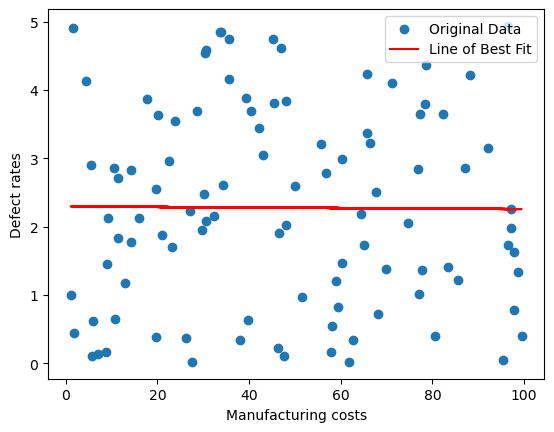

In [101]:
#standard deviation and sample size

#print(list(df['Manufacturing costs']))
#list(df['Defect rates'])

x = df[['Manufacturing costs']]
y = df[['Defect rates']]


person_corr = df[['Manufacturing costs','Defect rates']].corr(method='pearson').loc['Manufacturing costs','Defect rates']
covariance = df[['Manufacturing costs','Defect rates']].cov().loc['Manufacturing costs','Defect rates']
standardDevMC = df[['Manufacturing costs']].std().item()
standardDevDR =  df[['Defect rates']].std().item()
sampleSize = float(len(df))


slope, intercept, r_value, p_value, std_err = stats.linregress(df['Manufacturing costs'], df['Defect rates'])

# 2. Create the "Line" equation: y = mx + b
# We use this to create the points for the line on a graph
line = slope * df['Manufacturing costs'] + intercept

# 3. Visualize it
plt.scatter(df['Manufacturing costs'], df['Defect rates'], label='Original Data')
plt.plot(df['Manufacturing costs'], line, color='red', label='Line of Best Fit')
plt.xlabel('Manufacturing costs')
plt.ylabel('Defect rates')
plt.legend()
plt.show()

This shows there is not a statistically significant corelation between Manufacuring costs and the defect rates.

3. Shipping & Logistics Efficiency
The Goal: Reduce the "last mile" cost and time.

Target Variables: Shipping times, Shipping carriers, Shipping costs, Transportation modes, Routes.

What you can do:

Cost-Benefit Map: Compare Shipping costs against Shipping times for different Transportation modes. Is the Air route actually significantly faster than the Sea route for the price difference?

Carrier Benchmarking: Which Shipping carriers have the highest variance in Shipping times? This helps in choosing the most reliable partner for specific Routes.

In [102]:
shipping_df = pd.DataFrame(df[['SKU', 'Product type','Price','Shipping times','Shipping carriers','Shipping costs','Supplier name','Location','Lead time','Production volumes','Transportation modes','Routes','Costs']])



In [125]:
print(shipping_df.groupby(by='Transportation modes')['Shipping costs'].mean())
print('\n')
print(shipping_df.groupby(by='Transportation modes')['Shipping times'].mean())

airByDays = shipping_df.groupby(by='Transportation modes')['Shipping costs'].mean()["Air"] / shipping_df.groupby(by='Transportation modes')['Shipping times'].mean()["Air"]
seaByDays = shipping_df.groupby(by='Transportation modes')['Shipping costs'].mean()["Sea"] / shipping_df.groupby(by='Transportation modes')['Shipping times'].mean()["Sea"]

print('Cost per day Air: ', airByDays)
print('Cost per day Sea: ', seaByDays)
print("Percent Increase: ", round(((airByDays - seaByDays) / seaByDays) * 100,ndigits=2),'%') 

# The company is paying about 68% per shipping day when using Air vs sea. It would be interesting to investiage to see if opperations can be moved to sea to save on shipping costs, as the cost per day is not that influential.

Transportation modes
Air     6.017839
Rail    5.469098
Road    5.542115
Sea     4.970294
Name: Shipping costs, dtype: float64


Transportation modes
Air     5.115385
Rail    6.571429
Road    4.724138
Sea     7.117647
Name: Shipping times, dtype: float64
Cost per day Air:  1.1764197279770232
Cost per day Sea:  0.6983057426347634
Percent Increase:  68.47 %


In [108]:
print(shipping_df.groupby(by='Routes')['Shipping times'].mean())

Routes
Route A    6.023256
Route B    5.702703
Route C    5.250000
Name: Shipping times, dtype: float64


In [114]:
print("Shipping Carriers means:")
print(shipping_df.groupby(by=['Shipping carriers','Routes'])['Shipping times'].mean())
print("Variance:")
print(shipping_df.groupby(by=['Shipping carriers','Routes'])['Shipping times'].var())

Shipping Carriers means:
Shipping carriers  Routes 
Carrier A          Route A    6.250000
                   Route B    6.384615
                   Route C    4.666667
Carrier B          Route A    5.764706
                   Route B    6.000000
                   Route C    3.400000
Carrier C          Route A    6.142857
                   Route B    4.000000
                   Route C    8.142857
Name: Shipping times, dtype: float64
Variance:
Shipping carriers  Routes 
Carrier A          Route A     8.931818
                   Route B    10.089744
                   Route C    22.333333
Carrier B          Route A     7.316176
                   Route B     3.600000
                   Route C     4.711111
Carrier C          Route A     5.516484
                   Route B     5.714286
                   Route C     1.809524
Name: Shipping times, dtype: float64


In [115]:
print(shipping_df.groupby(by=['Shipping carriers','Transportation modes','Routes'])['Shipping times'].mean())

Shipping carriers  Transportation modes  Routes 
Carrier A          Air                   Route A     4.500000
                                         Route B     6.333333
                   Rail                  Route A     7.333333
                                         Route B     6.666667
                                         Route C    10.000000
                   Road                  Route A     6.000000
                                         Route B     5.800000
                                         Route C     2.000000
                   Sea                   Route A     6.666667
                                         Route B     7.500000
Carrier B          Air                   Route A     5.500000
                                         Route B     4.333333
                                         Route C     2.600000
                   Rail                  Route A     5.857143
                                         Route B     7.142857
                     

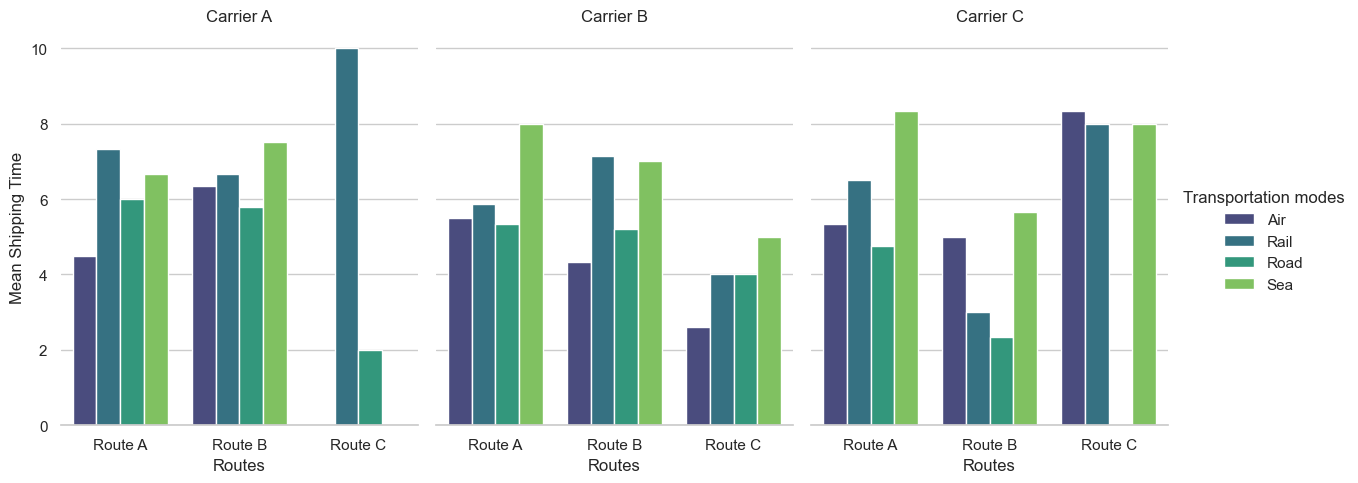

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = shipping_df.groupby(by=['Shipping carriers','Transportation modes','Routes'])['Shipping times'].mean()

# 2. Reset the index to make the data 'flat' for plotting
plot_df = df.reset_index()

# 3. Create the faceted bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=plot_df, 
    kind="bar",
    x="Routes", 
    y="Shipping times", 
    hue="Transportation modes",
    col="Shipping carriers", 
    palette="viridis", 
    height=5, 
    aspect=0.8
)

# 4. Final touches for readability
g.set_axis_labels("Routes", "Mean Shipping Time")
g.set_titles("{col_name}")
g.despine(left=True)

plt.show()

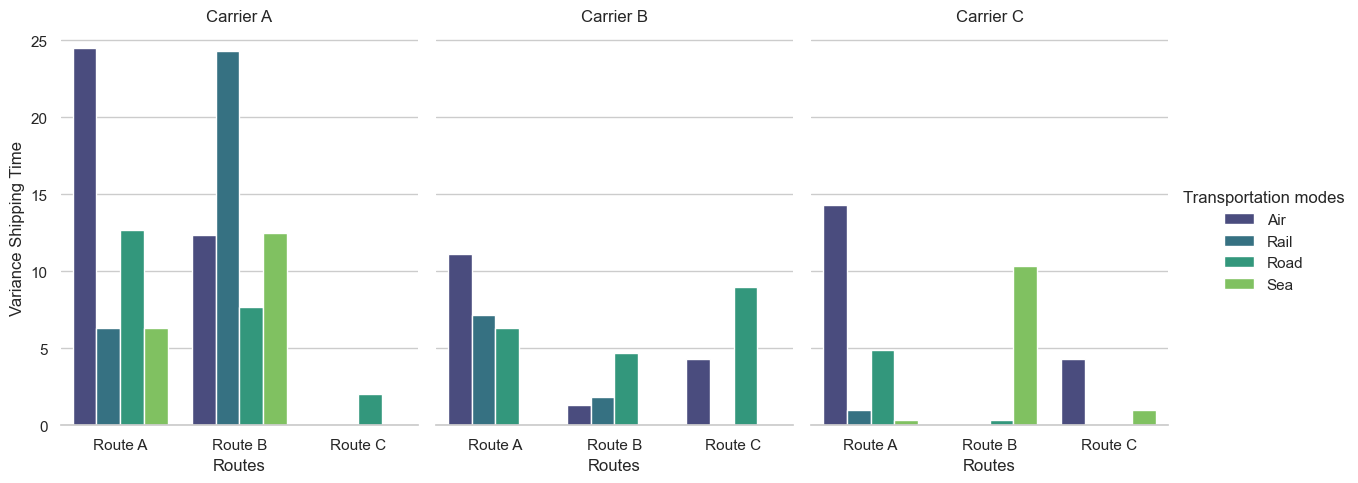

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = shipping_df.groupby(by=['Shipping carriers','Transportation modes','Routes'])['Shipping times'].var()

# 2. Reset the index to make the data 'flat' for plotting
plot_df = df.reset_index()

# 3. Create the faceted bar chart
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=plot_df, 
    kind="bar",
    x="Routes", 
    y="Shipping times", 
    hue="Transportation modes",
    col="Shipping carriers", 
    palette="viridis", 
    height=5, 
    aspect=0.8
)

# 4. Final touches for readability
g.set_axis_labels("Routes", "Variance Shipping Time")
g.set_titles("{col_name}")
g.despine(left=True)

plt.show()

In [141]:
'''
Key takeaways:

For any sucessful business, both a low variance and mean is important, thus I created a Reliability score, to see which Transportation methods, Routes and Carriers we should be using.

Reliability score (Coefficient of Variation) = Sigma / Mu
sigma = is the Standard Deviation (the square root of the Variance)
mu = mean

A good starting point would to look at the top 4 [carrieers + route] and call them to figure out why these routes have such high scores. A high score indicates there is something broken
in the process, as either the mean time or variance is really high.
'''


## This creates a table with both metrics side-by-side
analysis_df = shipping_df.groupby(['Shipping carriers', 'Routes']).agg({'Shipping times': ['mean', 'var', 'std']})
analysis_df.columns = ['mean', 'var', 'std']
analysis_df['Reliability score'] = analysis_df['mean'] / analysis_df['std']

print(analysis_df.sort_values(by='Reliability score', ascending=False))


                               mean        var       std  Reliability score
Shipping carriers Routes                                                   
Carrier C         Route C  8.142857   1.809524  1.345185           6.053334
Carrier B         Route B  6.000000   3.600000  1.897367           3.162278
Carrier C         Route A  6.142857   5.516484  2.348720           2.615407
Carrier B         Route A  5.764706   7.316176  2.704843           2.131253
Carrier A         Route A  6.250000   8.931818  2.988615           2.091270
                  Route B  6.384615  10.089744  3.176436           2.009994
Carrier C         Route B  4.000000   5.714286  2.390457           1.673320
Carrier B         Route C  3.400000   4.711111  2.170509           1.566453
Carrier A         Route C  4.666667  22.333333  4.725816           0.987484


In [146]:
# Looking how to catorgize each of the [Shipping carriers, Routes] combinations. I am catorgizing it into 3 tiers called ["Gold", "Silver", "Avoid"]
GLOBAL_MEAN_THRESHOLD_GOLD = analysis_df['mean'].quantile(0.33)
GLOBAL_RS_THRESHOLD_GOLD = analysis_df['Reliability score'].quantile(0.66)

GLOBAL_MEAN_THRESHOLD_AVOID = analysis_df['mean'].quantile(0.33)
GLOBAL_RS_THRESHOLD_AVOID = analysis_df['Reliability score'].quantile(0.66)


def categorize_route(row):

    avg = row['mean']
    rel = row['Reliability score']

    if avg < GLOBAL_MEAN_THRESHOLD_GOLD and rel < GLOBAL_RS_THRESHOLD_GOLD:
        return 'Gold'
    
    elif avg > GLOBAL_MEAN_THRESHOLD_AVOID and rel > GLOBAL_RS_THRESHOLD_AVOID:
        return 'Avoid'
    else:
        return 'Silver'
    

analysis_df['Tier'] = analysis_df.apply(categorize_route, axis=1)
print(analysis_df)


                               mean        var       std  Reliability score  \
Shipping carriers Routes                                                      
Carrier A         Route A  6.250000   8.931818  2.988615           2.091270   
                  Route B  6.384615  10.089744  3.176436           2.009994   
                  Route C  4.666667  22.333333  4.725816           0.987484   
Carrier B         Route A  5.764706   7.316176  2.704843           2.131253   
                  Route B  6.000000   3.600000  1.897367           3.162278   
                  Route C  3.400000   4.711111  2.170509           1.566453   
Carrier C         Route A  6.142857   5.516484  2.348720           2.615407   
                  Route B  4.000000   5.714286  2.390457           1.673320   
                  Route C  8.142857   1.809524  1.345185           6.053334   

                             Tier  
Shipping carriers Routes           
Carrier A         Route A  Silver  
                  Rout

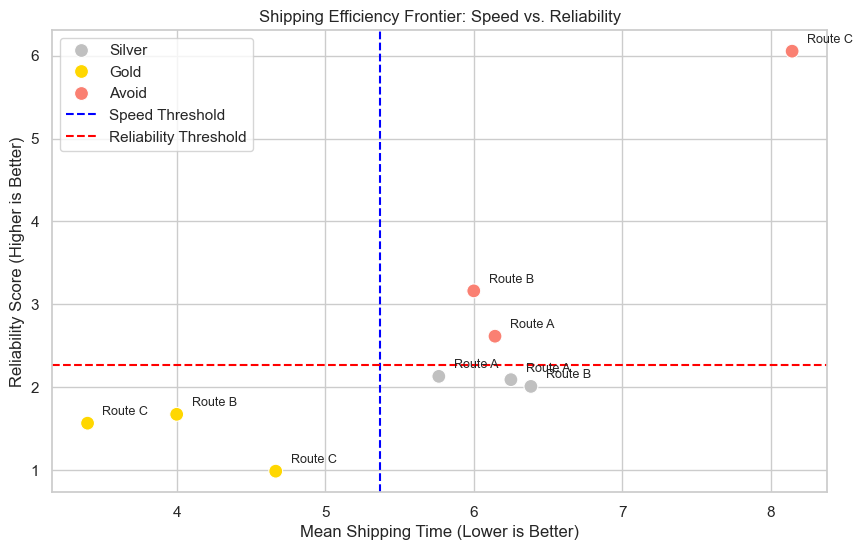

In [148]:
''' Visualization of the chart above'''
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

plot = sns.scatterplot(
    data=analysis_df, 
    x='mean', 
    y='Reliability score', 
    hue='Tier', 
    s=100, 
    palette={'Gold': 'gold', 'Silver': 'silver', 'Avoid': 'salmon'}
)

plt.axvline(x=GLOBAL_MEAN_THRESHOLD_GOLD, color='blue', linestyle='--', label='Speed Threshold')
plt.axhline(y=GLOBAL_RS_THRESHOLD_GOLD, color='red', linestyle='--', label='Reliability Threshold')

for i in range(analysis_df.shape[0]):
    plt.text(
        x=analysis_df['mean'].iloc[i] + 0.1, 
        y=analysis_df['Reliability score'].iloc[i] + 0.1, 
        s=analysis_df.index[i][1], 
        fontsize=9
    )

plt.title('Shipping Efficiency Frontier: Speed vs. Reliability')
plt.xlabel('Mean Shipping Time (Lower is Better)')
plt.ylabel('Reliability Score (Higher is Better)')
plt.legend()
plt.show()